<a href="https://colab.research.google.com/github/swaroopsaikuchi/Neural_Tensor/blob/main/Evaluating_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [83]:
## evaluating the model
## build a model -> fit a model -> evaluate a model  -> tweak  a model
x = tf.range(0,150,5)
y = x+ 10
x , y

(<tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145], dtype=int32)>,
 <tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
        140, 145, 150, 155], dtype=int32)>)

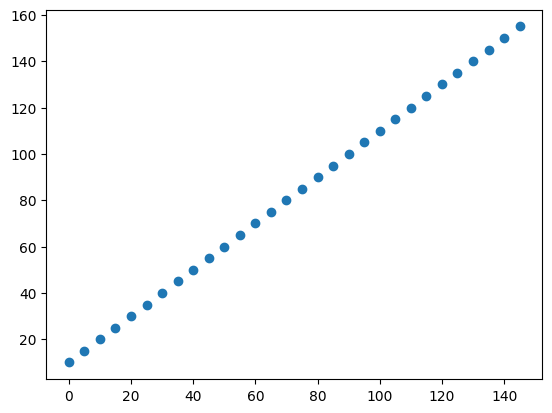

In [84]:
plt.scatter(x,y)

In [85]:
# lets divide this data into test and train spilt
# break this data into 80% for testing and 20% for training
x_train = x[:24]
y_train = y[:24]
x_test = x[24:]
y_test = y[24:]
x_train, y_train,x_test,y_test

(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125], dtype=int32)>,
 <tf.Tensor: shape=(6,), dtype=int32, numpy=array([120, 125, 130, 135, 140, 145], dtype=int32)>,
 <tf.Tensor: shape=(6,), dtype=int32, numpy=array([130, 135, 140, 145, 150, 155], dtype=int32)>)

(<matplotlib.collections.PathCollection at 0x795516e698d0>,
 <matplotlib.collections.PathCollection at 0x795516e69d20>)

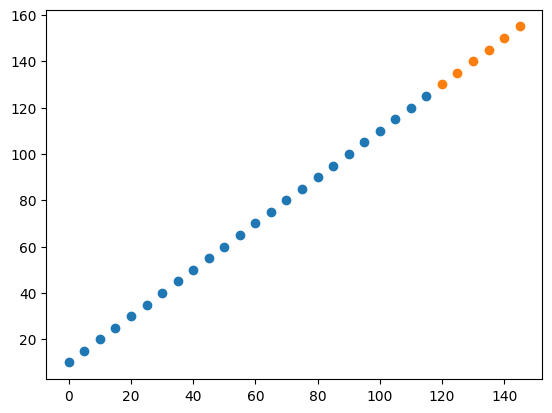

In [86]:
plt.scatter(x_train,y_train),plt.scatter(x_test,y_test)

In [87]:
# lets build a neural network for our model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(77, name="input"),
    tf.keras.layers.Dense(1, name="output")

])
model.compile(loss = "mae",
               optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs = 100,verbose = 1 )

Epoch 1/100
1/1 [==============================] - 0s 393ms/step - loss: 56.2426 - mae: 56.2426
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 66.7404 - mae: 66.7404
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 61.8424 - mae: 61.8424
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5884 - mae: 6.5884
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 92.9900 - mae: 92.9900
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 39.6264 - mae: 39.6264
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9374 - mae: 8.9374
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 46.6383 - mae: 46.6383
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3149 - mae: 14.3149
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 65.7886 - mae: 65.7886
Epoch 11/100
1/1 [==============================] - 0s

In [88]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 77)                154       
                                                                 
 output (Dense)              (None, 1)                 78        
                                                                 
Total params: 232 (928.00 Byte)
Trainable params: 232 (928.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


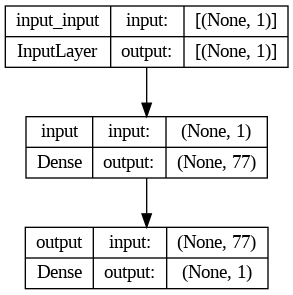

In [89]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [90]:
# visualize our model's predictions
# we will do some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[109.34562],
       [113.87997],
       [118.41432],
       [122.94867],
       [127.48301],
       [132.01738]], dtype=float32)

In [91]:
y_test,y_train

(<tf.Tensor: shape=(6,), dtype=int32, numpy=array([130, 135, 140, 145, 150, 155], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125], dtype=int32)>)

In [92]:
def plot(x_train,y_train,x_test,y_test,y_pred):
  plt.scatter(x_train,y_train), plt.scatter(x_test,y_test), plt.scatter(y_test,y_pred,c="r")

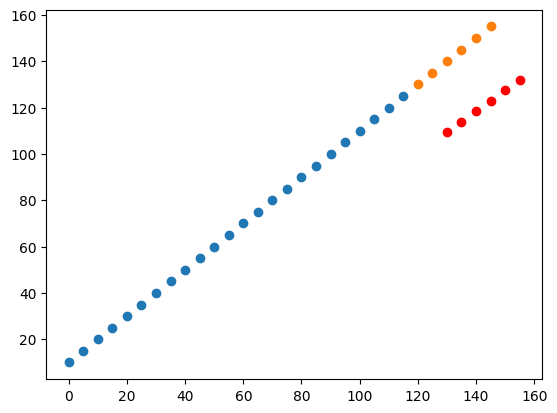

In [93]:
plot(x_train,y_train,x_test,y_test,y_pred)

Evaluating our model predictions with regression evaluation metrics
since we are working on regression , we have mainly two evaluation metrics
1. Mean absolute error(MAE)
2. Mean squared error (MSE)

In [94]:
# evaluate the model on the test data
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 118ms/step - loss: 21.8185 - mae: 21.8185


[21.818506240844727, 21.818506240844727]

In [95]:
tf.keras.losses.mae(y_test,y_pred)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([33.154385, 28.620031, 24.085678, 19.55133 , 15.016991, 11.15508 ],
      dtype=float32)>

In [96]:
y_test

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([130, 135, 140, 145, 150, 155], dtype=int32)>

In [97]:
y_pred

array([[109.34562],
       [113.87997],
       [118.41432],
       [122.94867],
       [127.48301],
       [132.01738]], dtype=float32)

In [98]:
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([33.154385, 28.620031, 24.085678, 19.55133 , 15.016991, 11.15508 ],
      dtype=float32)>

If we have different shapes then we should change it by tf.squeeze function

In [99]:
# calculate the mean absolute error
mae = tf. metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([33.154385, 28.620031, 24.085678, 19.55133 , 15.016991, 11.15508 ],
      dtype=float32)>

Calculating Mean square Error

In [100]:
mse = tf.metrics.mean_squared_error(y_test,y_pred)
mse

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([1172.1298 ,  892.02295,  653.03656,  455.17117,  298.42667,
        182.802  ], dtype=float32)>

In [101]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,y_pred)
def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)

To Improve our regression model performance we can change the following parameters :
1. get more data
2. make your model larger
3. train for longer
lets do three modelling experiments
**model1** : 1 layer trained for 500 epochs

**model2** : 2 layer trained for 100 epochs

**model3** : 3 layer trained for 500 epochs


In [102]:
## model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 68.9802 - mae: 68.9802
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 66.1636 - mae: 66.1636
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 67.5092 - mae: 67.5092
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8261 - mae: 6.8261
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 94.8816 - mae: 94.8816
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 39.7227 - mae: 39.7227
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6324 - mae: 9.6324
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 46.5421 - mae: 46.5421
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6489 - mae: 13.6489
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 67.5051 - mae: 67.5051
Epoch 11/100
1/1 [==============================] - 0s 

In [103]:
y_pred_1 = model_1.predict(x_test)
y_pred_1 = tf.constant(y_pred_1)
y_pred_1


1/1 [==============================] - 0s 88ms/step


<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[194.11082],
       [202.17456],
       [210.23827],
       [218.302  ],
       [226.36568],
       [234.4294 ]], dtype=float32)>

In [104]:
y_test

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([130, 135, 140, 145, 150, 155], dtype=int32)>

In [105]:
## finding evaluation metrics
mae_1 = tf. metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_1))

mse_1 =mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=71.77012>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5178.327>)

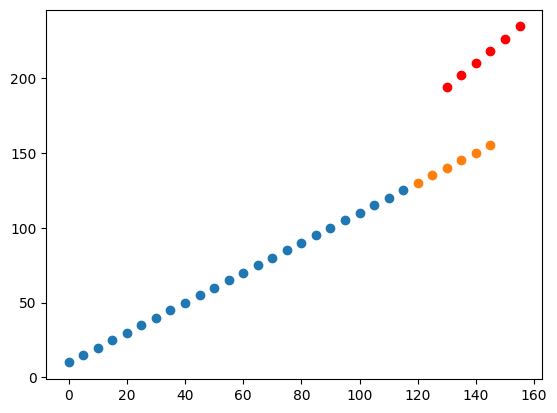

In [106]:
plot(x_train,y_train,x_test,y_test,y_pred_1)

In [107]:
# model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 58.5683 - mae: 58.5683
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 22.4736 - mae: 22.4736
Epoch 3/500
1/1 [==============================] - 0s 25ms/step - loss: 61.0517 - mae: 61.0517
Epoch 4/500
1/1 [==============================] - 0s 27ms/step - loss: 22.9507 - mae: 22.9507
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 49.4037 - mae: 49.4037
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 47.1154 - mae: 47.1154
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 14.6434 - mae: 14.6434
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 65.1387 - mae: 65.1387
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 43.3372 - mae: 43.3372
Epoch 10/500
1/1 [==============================] - 0s 21ms/step - loss: 7.3991 - mae: 7.3991
Epoch 11/500
1/1 [==============================] - 0

In [108]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

1/1 [==============================] - 0s 159ms/step


array([[53.669666],
       [55.81058 ],
       [57.951492],
       [60.092403],
       [62.233322],
       [64.37423 ]], dtype=float32)

In [109]:
mae_2 = tf. metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_2))

mse_2 =mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=83.47805>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6992.4272>)

(<matplotlib.collections.PathCollection at 0x7955170f51e0>,
 <matplotlib.collections.PathCollection at 0x7955170f5990>)

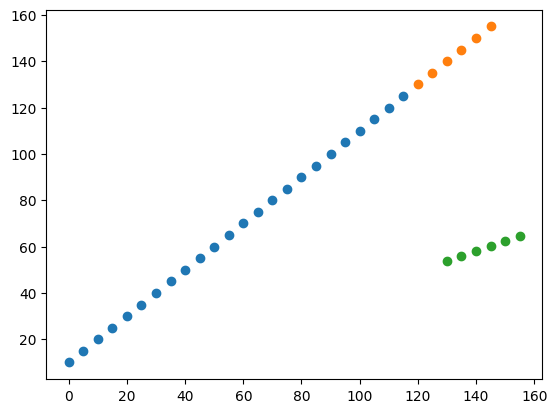

In [110]:
plt.scatter(x_train,y_train),plt.scatter(x_test,y_test),plt.scatter(y_test,y_pred_2)

In [111]:
## lets compare our model results using a dataframe
import pandas as pd
model_results = [ ["model_1",mae_1.numpy(),mse_1.numpy()],
                   ["model_2",mae_2.numpy(),mse_2.numpy()]

]


In [112]:
 results = pd.DataFrame(model_results, columns=["model","mae","mse"])
 results


,model,mae,mse
0,model_1,71.770119,5178.327148
1,model_2,83.478050,6992.427246


saving our models


1) The saved model format


2) The HDF5 format




In [116]:
model_2.save("best_model_tillnow")

**Now we will Load the saved model **

In [119]:
saved_model = tf.keras.models.load_model("/content/best_model_tillnow")
saved_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
y_pred_11 = saved_model.predict(x_test)
y_pred_22 = model_2.predict(x_test)
y_pred_11 == y_pred_22

1/1 [==============================] - 0s 19ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])